INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

TABLA DE COEFICIENTES DE DETERMINACIÓN Y CORRELACIÓN (OTTAWA)

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
07/10/2024

# Librerías y carga de Archivo

In [16]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [18]:
# Antes de dividir el dataframe, observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

room_type        room_type_num
Entire home/apt  0                1759
Private room     1                1096
Shared room      2                   7
Name: count, dtype: int64

In [19]:
# Separamos los datos cuantitativos
df = df.select_dtypes(np.number)
df

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,1,...,3,2,3,3,5,0.65,5,5,5,5
1,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,2,...,1,3,3,2,5,0.04,5,5,5,5
2,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,1,...,3,2,4,1,5,0.12,5,5,5,5
3,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,5,...,3,2,3,4,5,0.57,5,5,5,5
4,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,2,...,3,2,3,2,5,0.09,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,1,...,3,2,4,1,5,1.16,5,5,5,5
2858,348027803,2020,1,2,1,1,45.419361,-75.667223,1.0,1,...,3,3,3,1,5,1.16,5,5,5,5
2859,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,4,...,3,2,3,4,5,1.16,5,5,5,5
2860,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,2,...,3,2,3,1,5,1.16,5,5,5,5


# Tabla de coeficientes de determinación y correlación

## Entire Home / apt

In [20]:
dfHome = df[df["room_type_num"] == 0]
dfHome

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,1369632,2011,1,1,1,1,45.390840,-75.756210,1.0,1,...,3,2,3,3,5,0.65,5,5,5,5
1,415201,2011,0,1,1,1,45.168200,-75.712080,1.0,2,...,1,3,3,2,5,0.04,5,5,5,5
3,2058676,2012,1,1,1,1,45.269100,-75.721970,1.0,5,...,3,2,3,4,5,0.57,5,5,5,5
4,3201295,2012,0,6,1,1,45.404550,-75.731300,1.0,2,...,3,2,3,2,5,0.09,5,5,5,5
5,3201295,2012,0,6,1,1,45.400300,-75.731440,1.0,2,...,3,2,3,2,5,0.08,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,27076237,2015,0,8,1,1,45.440390,-75.657106,1.0,2,...,3,3,3,4,5,1.16,5,5,5,5
2854,475319012,2022,1,25,1,1,45.252685,-75.754497,3.5,4,...,3,1,3,4,5,1.00,5,5,5,5
2859,85297148,2016,0,84,1,1,45.093966,-75.595666,3.0,4,...,3,2,3,4,5,1.16,5,5,5,5
2860,21218752,2014,0,1,1,1,45.402610,-75.730990,1.0,2,...,3,2,3,1,5,1.16,5,5,5,5


In [21]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfHome = dfHome.drop("room_type_num", axis = 1)
corrTabla1 = abs(dfHome.corr())
corrTabla1

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_id,1.000000,0.977422,0.032706,0.183235,0.272767,0.161968,0.118238,0.000745,0.100377,0.142261,...,0.021907,0.032726,0.019681,0.050765,0.016852,0.114487,0.009739,0.004648,0.029110,0.026030
host_since,0.977422,1.000000,0.028780,0.167886,0.263971,0.165314,0.109379,0.002199,0.101529,0.134616,...,0.033904,0.040594,0.017220,0.041045,0.023739,0.123140,0.013816,0.003443,0.023568,0.023350
host_is_superhost,0.032706,0.028780,1.000000,0.170837,0.069132,0.166267,0.041471,0.012857,0.122970,0.075911,...,0.168315,0.005947,0.027861,0.098606,0.154629,0.194011,0.113576,0.160188,0.139125,0.112619
host_listings_count,0.183235,0.167886,0.170837,1.000000,0.048692,0.058318,0.039575,0.067557,0.076764,0.117970,...,0.101487,0.018115,0.008065,0.093450,0.181898,0.122136,0.057864,0.176758,0.118310,0.211934
host_has_profile_pic,0.272767,0.263971,0.069132,0.048692,1.000000,0.175183,0.074349,0.020617,0.047761,0.065032,...,0.066226,0.005000,0.006817,0.001656,0.015683,0.036828,0.014270,0.020561,0.034078,0.016634
host_identity_verified,0.161968,0.165314,0.166267,0.058318,0.175183,1.000000,0.069033,0.004525,0.000911,0.013220,...,0.070311,0.009052,0.008798,0.032037,0.006301,0.030807,0.014558,0.014554,0.035084,0.015420
latitude,0.118238,0.109379,0.041471,0.039575,0.074349,0.069033,1.000000,0.311861,0.274624,0.243706,...,0.077408,0.019651,0.174036,0.099668,0.086896,0.035314,0.091404,0.074002,0.049561,0.019331
longitude,0.000745,0.002199,0.012857,0.067557,0.020617,0.004525,0.311861,1.000000,0.073543,0.070307,...,0.012589,0.051784,0.038742,0.089845,0.005820,0.041538,0.048598,0.016212,0.006760,0.013781
bathrooms,0.100377,0.101529,0.122970,0.076764,0.047761,0.000911,0.274624,0.073543,1.000000,0.679950,...,0.025146,0.062765,0.041564,0.497902,0.097025,0.017174,0.062460,0.076889,0.049030,0.019848
bedrooms,0.142261,0.134616,0.075911,0.117970,0.065032,0.013220,0.243706,0.070307,0.679950,1.000000,...,0.031073,0.116504,0.055003,0.571689,0.075535,0.014019,0.021640,0.047681,0.000539,0.001661


<Axes: >

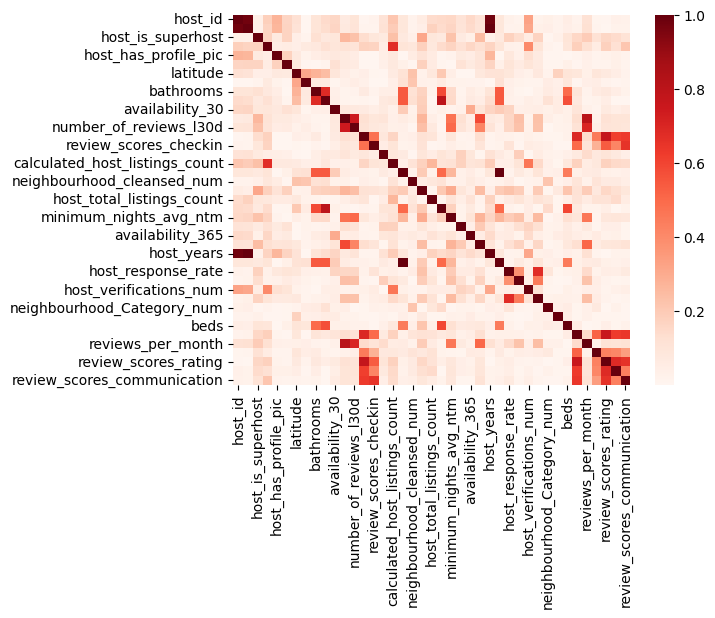

In [30]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(corrTabla1, cmap = 'Reds')
Heat_Map1

## Private Room

In [22]:
dfPrivate = df[df["room_type_num"] == 1]
dfPrivate

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
2,2401179,2012,1,5,1,1,45.405500,-75.676120,1.0,1,...,3,2,4,1,5,0.12,5,5,5,5
6,3894080,2012,0,1,1,1,45.348360,-75.628820,1.5,1,...,3,0,5,2,5,0.21,5,5,5,5
7,3895093,2012,0,1,1,1,45.417530,-75.692970,1.0,1,...,3,2,5,1,4,0.05,5,5,5,5
12,1755714,2012,1,8,1,1,45.347610,-75.784300,1.0,1,...,3,2,5,1,5,0.36,5,5,5,5
14,8713727,2013,1,3,1,1,45.322834,-75.601283,1.5,1,...,3,2,5,1,5,0.31,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852,561050183,2024,0,5,1,1,45.352328,-75.615733,1.0,1,...,3,0,3,1,5,1.00,5,5,5,5
2855,486026361,2022,0,6,1,1,45.444763,-75.519346,1.5,1,...,3,0,3,1,5,1.16,5,5,5,5
2856,486026361,2022,0,6,1,1,45.444848,-75.519913,1.0,1,...,3,0,3,1,5,1.16,5,5,5,5
2857,104583371,2016,0,3,1,1,45.323071,-75.607969,1.0,1,...,3,2,4,1,5,1.16,5,5,5,5


In [24]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfPrivate = dfPrivate.drop("room_type_num", axis = 1)
corrTabla2 = abs(dfPrivate.corr())
corrTabla2

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_id,1.000000,0.978444,0.071485,0.081433,0.191216,0.154682,0.199879,0.066764,0.034169,0.040403,...,0.117796,0.014213,0.134640,0.073943,0.007873,0.130931,0.022283,0.003972,0.048299,0.008942
host_since,0.978444,1.000000,0.064438,0.080843,0.185612,0.149927,0.195809,0.068704,0.032598,0.036192,...,0.132000,0.007300,0.135309,0.070994,0.018770,0.134552,0.026605,0.007831,0.042866,0.016887
host_is_superhost,0.071485,0.064438,1.000000,0.055896,0.101901,0.119868,0.120547,0.113786,0.018766,0.021366,...,0.206983,0.064161,0.077048,0.050163,0.123034,0.141293,0.094390,0.120903,0.132223,0.086574
host_listings_count,0.081433,0.080843,0.055896,1.000000,0.063588,0.018052,0.078079,0.093254,0.073284,0.073972,...,0.156655,0.244281,0.020458,0.016631,0.275745,0.042627,0.187165,0.276868,0.235045,0.298018
host_has_profile_pic,0.191216,0.185612,0.101901,0.063588,1.000000,0.075572,0.042830,0.045121,0.047710,0.012286,...,0.108549,0.008130,0.067598,0.004004,0.004231,0.020842,0.031894,0.001919,0.003348,0.037108
host_identity_verified,0.154682,0.149927,0.119868,0.018052,0.075572,1.000000,0.046071,0.009008,0.048708,0.046792,...,0.002163,0.018698,0.083903,0.002263,0.007899,0.021285,0.031419,0.005275,0.012447,0.017731
latitude,0.199879,0.195809,0.120547,0.078079,0.042830,0.046071,1.000000,0.605928,0.056997,0.044115,...,0.170556,0.063779,0.063924,0.050164,0.048182,0.008423,0.064236,0.053200,0.063638,0.040670
longitude,0.066764,0.068704,0.113786,0.093254,0.045121,0.009008,0.605928,1.000000,0.016869,0.013177,...,0.090463,0.175627,0.017362,0.020691,0.015289,0.021004,0.032326,0.020227,0.015264,0.024715
bathrooms,0.034169,0.032598,0.018766,0.073284,0.047710,0.048708,0.056997,0.016869,1.000000,0.272593,...,0.010603,0.045743,0.023990,0.105867,0.020403,0.018486,0.053956,0.018783,0.011927,0.052814
bedrooms,0.040403,0.036192,0.021366,0.073972,0.012286,0.046792,0.044115,0.013177,0.272593,1.000000,...,0.057644,0.027350,0.024960,0.354180,0.015832,0.077272,0.033261,0.020808,0.013905,0.007042


<Axes: >

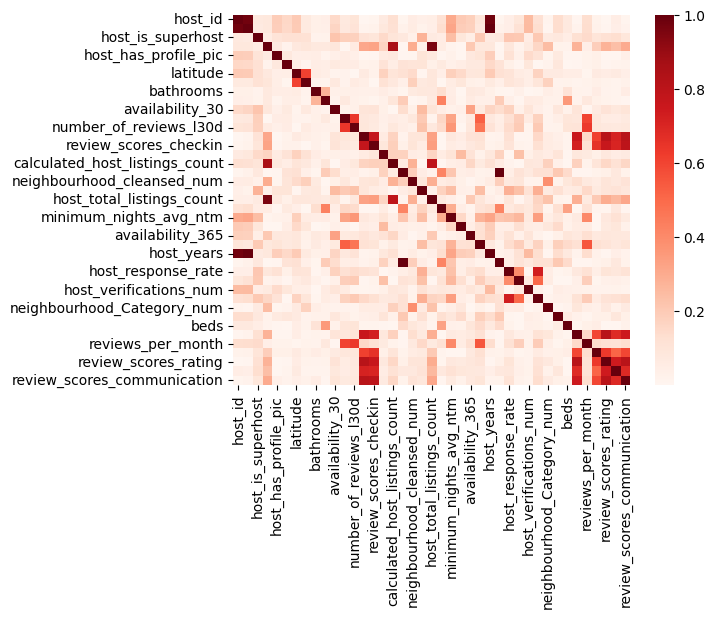

In [29]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(corrTabla2, cmap = 'Reds')
Heat_Map2

## Shared Room

In [23]:
dfShared = df[df["room_type_num"] == 2]
dfShared

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
2036,529763480,2023,0,1,1,1,45.439263,-75.492699,1.0,1,...,0,3,5,1,5,1.16,5,5,5,5
2811,133508759,2017,0,10,0,1,45.408840,-75.697406,1.0,1,...,2,2,5,6,5,1.00,5,5,5,5
2824,133508759,2017,0,10,0,1,45.408939,-75.699061,1.0,1,...,2,2,5,1,4,1.00,5,5,5,5
2825,133508759,2017,0,10,0,1,45.410542,-75.699181,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2826,133508759,2017,0,10,0,1,45.410159,-75.697533,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2827,133508759,2017,0,10,0,1,45.408708,-75.699440,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2828,133508759,2017,0,10,0,1,45.408797,-75.699180,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5


In [25]:
# Encontramos el valor absoluto de todas las correlaciones entre las variables
dfShared = dfShared.drop("room_type_num", axis = 1)
corrTabla3 = abs(dfShared.corr())
corrTabla3

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_id,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.997910,0.999943,NaN,NaN,...,1.000000,1.000000,NaN,1.666667e-01,0.166667,0.258199,NaN,NaN,NaN,NaN
host_since,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.997910,0.999943,NaN,NaN,...,1.000000,1.000000,NaN,1.666667e-01,0.166667,0.258199,NaN,NaN,NaN,NaN
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.997910,0.999943,NaN,NaN,...,1.000000,1.000000,NaN,1.666667e-01,0.166667,0.258199,NaN,NaN,NaN,NaN
host_has_profile_pic,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.997910,0.999943,NaN,NaN,...,1.000000,1.000000,NaN,1.666667e-01,0.166667,0.258199,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.997910,0.997910,NaN,0.997910,0.997910,NaN,1.000000,0.997968,NaN,NaN,...,0.997910,0.997910,NaN,1.854083e-01,0.181545,0.284241,NaN,NaN,NaN,NaN
longitude,0.999943,0.999943,NaN,0.999943,0.999943,NaN,0.997968,1.000000,NaN,NaN,...,0.999943,0.999943,NaN,1.597041e-01,0.169077,0.254673,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

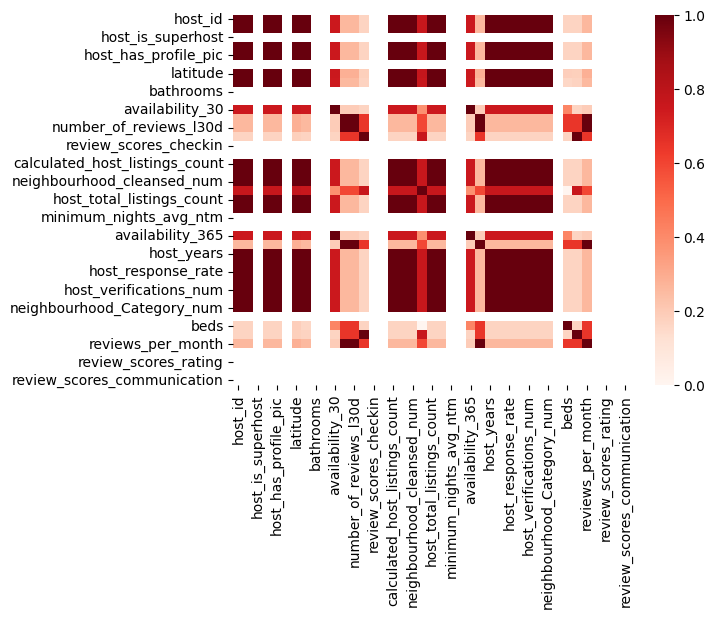

In [31]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map3 = sns.heatmap(corrTabla3, cmap = 'Reds')
Heat_Map3